<a href="https://colab.research.google.com/github/brunograssano/TP-Organizacion-de-datos/blob/main/TP_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico: Analisis Exploratorio - Organizacion de Datos

## Introduccion

En el presente trabajo se propone realizar un analisis de los datos recolectados por una empresa en los ultimos 2 meses sobre los clientes que fueron a ver la pelicula Frozen 3. La encuesta consistia en una serie de preguntas personales que concluia si el cliente volveria a ese cine si salia Frozen 4.

El objetivo de la empresa es poder dirigir futuras campañas de marketing digital en base a esta informacion recolectada

## Objetivos

El objetivo del notebook es:
*   Entender los datos
*   Ver como los datos se relacionan entre si
*   Poder sacar alguna conclusión o descubrir un patrón a partir de estos
*   Indicar cuáles son los factores más importantes que determinan si un usuario va a ir al cine a ver Frozen 4 o no.




## Configuraciones Iniciales

Primero cargamos las bibliotecas que se van a ir usando a lo largo del trabajo, y realizamos la configuracion para los graficos que armemos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y limpieza del set de datos

Cargamos ambos Datasets y vemos de dejarlos listos para comenzar el trabajo

In [2]:
usuario_volveria_df = pd.read_csv('tp-2020-2c-train-cols1.csv')
usuario_volveria_df.head()

,id_usuario,volveria
0,117,0
1,658,0
2,794,0
3,455,0
4,173,1


In [3]:
info_fiumark_df = pd.read_csv('tp-2020-2c-train-cols2.csv')
info_fiumark_df.head()

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo


Analizamos primero los tipos de datos que tienen ambos dataframes con el objetivo de poder convertirlos a otros que puedan llegar a ser mas utiles.

In [4]:
usuario_volveria_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_usuario  801 non-null    int64
 1   volveria    801 non-null    int64
dtypes: int64(2)
memory usage: 12.6 KB


Notamos que la columna de 'volveria' es de tipo int64, cuando solamente tiene valores que pueden ser 0 o 1. Un mejor tipo de dato para este caso puede ser un int8. Esto permitiria ahorrar memoria. (Aunque en este caso no sean muchos datos)

In [5]:
usuario_volveria_df['volveria'] = usuario_volveria_df['volveria'].astype(np.int8)

Observamos en la informacion del dataframe que hay 801 registros y que para este caso no se encuentran valores nulos

Veamos ahora el otro dataframe. Este dataframe contiene la informacion respecto de las personas. 

In [6]:
info_fiumark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tipo_de_sala   801 non-null    object 
 1   nombre         801 non-null    object 
 2   id_usuario     801 non-null    int64  
 3   genero         801 non-null    object 
 4   edad           641 non-null    float64
 5   amigos         801 non-null    int64  
 6   parientes      801 non-null    int64  
 7   id_ticket      801 non-null    object 
 8   precio_ticket  801 non-null    int64  
 9   fila           177 non-null    object 
 10  nombre_sede    799 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 69.0+ KB


Notamos una gran cantidad de valores nulos en la columna "fila" y algunos en "edad" y "nombre_sede". Como las columnas que tienen los valores nulos pueden llegar a ser relevantes para el analisis, siendo este el caso de las columnas "fila" y "edad" decidimos crear la categoria "No responde" para el caso de "fila".

In [7]:
info_fiumark_df['fila'].fillna("No responde",inplace=True)

Ahora vemos la cantidad de valores unicos para las columnas de tipo objeto, para poder determinar a cuales les corresponderia tener un tipo categorico.

In [8]:
info_fiumark_df.select_dtypes(include=['object']).nunique()

tipo_de_sala      3
nombre          801
genero            2
id_ticket       635
fila              3
nombre_sede       3
dtype: int64

In [9]:
info_fiumark_df["tipo_de_sala"] = info_fiumark_df["tipo_de_sala"].astype("category")
info_fiumark_df["genero"] = info_fiumark_df["genero"].astype("category")
info_fiumark_df["nombre_sede"] = info_fiumark_df["nombre_sede"].astype("category")
info_fiumark_df["fila"] = info_fiumark_df["fila"].astype("category")


Otra cosa que observamos que las edades estan en formato de float, lo cual nos resulto llamativo, por lo que decidimos cortar los valores, llevandolos al piso.

In [10]:
info_fiumark_df['edad'] = info_fiumark_df['edad'].apply(np.floor) 
#info_fiumark_df['edad'] = info_fiumark_df['edad'].astype(np.int) # VER QUE HACEMOS CON LOS VALORES NULOS, PREGUNTAR SI ES VALIDO TOMAR EL 3er CUANTIL POR LA EDAD

Tambien observamos que entre los datos que nos fueron entregados se encuentra el codigo de ticket: "id_ticket". Consideramos
que la informacion en ella es irrelevante para nuestros propositos y por lo tanto la eliminamos. Esta decision se debe a que parece que el codigo del ticket tiene forma de ser generada de forma aleatoria y no da la impresion de estar relacionada con la variable de interes para el analisis.

In [11]:
info_fiumark_df.drop(columns='id_ticket',inplace=True)

Habiendo hecho esos cambios, finalmente nos queda el dataframe de la siguiente forma. En el proceso se redujo el uso de memoria, pasando de 69.0KB a 41.2KB.

In [12]:
info_fiumark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tipo_de_sala   801 non-null    category
 1   nombre         801 non-null    object  
 2   id_usuario     801 non-null    int64   
 3   genero         801 non-null    category
 4   edad           641 non-null    float64 
 5   amigos         801 non-null    int64   
 6   parientes      801 non-null    int64   
 7   precio_ticket  801 non-null    int64   
 8   fila           801 non-null    category
 9   nombre_sede    799 non-null    category
dtypes: category(4), float64(1), int64(4), object(1)
memory usage: 41.2+ KB


In [13]:
info_fiumark_df.head()

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,precio_ticket,fila,nombre_sede
0,4d,Señor Camilo Pedro,117,hombre,73.0,0,0,1,No responde,fiumark_quilmes
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,2,No responde,fiumark_quilmes
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,3,No responde,fiumark_chacarita
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,1,No responde,fiumark_palermo
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,2,No responde,fiumark_palermo


Por ultimo, dejamos unidos ambos dataframes.

In [14]:
info_fiumark_df = info_fiumark_df.merge(usuario_volveria_df,on='id_usuario')
info_fiumark_df.head()

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,117,hombre,73.0,0,0,1,No responde,fiumark_quilmes,0
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,2,No responde,fiumark_quilmes,0
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,3,No responde,fiumark_chacarita,0
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,1,No responde,fiumark_palermo,0
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,2,No responde,fiumark_palermo,1


In [15]:
#Explicar qué conclusiones se pueden llegar a partir de analizar los datos recolectados. 
#La empresa quiere saber cómo entender cada uno de los datos, cómo se relacionan entre sí
#Si se puede sacar alguna conclusión o descubrir un patrón a partir de estos. 
#Adicionalmente quieren saber cuáles son los factores más importantes que determinan si un usuario va a ir al cine a ver Frozen 4 o no.

## Analisis exploratorio

Empecemos el analisis haciendonos algunas preguntas sencillas.  
* ¿Es el genero una variable determinante a la hora de decidir ver la secuela?
*
* ¿Afecta en algo el ir a disitintos tipos de sala la decision?
*
*
* 
* ¿Hay mas gente que iria a la secuela si fue a una sede en particular?
* ¿El precio fue determinante?

In [16]:
#¿Cuáles fueron las preguntas que se plantearon inicialmente?
#¿Qué se hizo para responder a esas preguntas?
#De los gráficos y análisis hechos, ¿qué conclusiones se pueden sacar?
#A partir del trabajo en los anteriores puntos, ¿surgieron nuevas dudas? -> Volver al paso 2
#A partir de todo el análisis anterior, construir el código baseline que se va a usar para la primera ronda de campaña digital. Fundamentar el código basándose en las conclusiones de los anteriores puntos.

### ¿Cuanto afecta el genero a la hora de ir a ver la siguiente pelicula?

Vemos que proporcion de los hombres y mujeres que fueron a ver la pelicula volverian a ver la secuela. Esto se puede obtener de forma sencilla.

A priori esperamos que la proporcion de mujeres que deciden ir a ver la secuela sea mucho mayor que la de los hombres que fueron a ver la pelicula.

In [17]:
porcentaje_generos_volveria = info_fiumark_df.groupby(by='genero')['volveria'].agg('mean')
porcentaje_generos_volveria.round(2)

genero
hombre    0.18
mujer     0.74
Name: volveria, dtype: float64

Habiendo hecho el calculo, en los numeros se ve claramente lo esperado.

Text(0.5, 0, 'Genero')

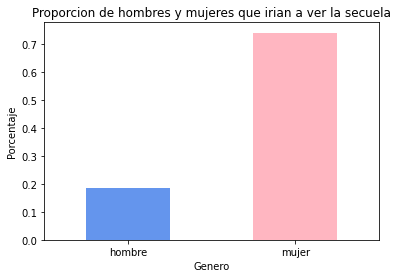

In [18]:
porcentaje_generos_volveria.plot(kind = 'bar',rot = 0, color = ['cornflowerblue','lightpink'], title = 'Proporcion de hombres y mujeres que irian a ver la secuela')
ax = plt.gca()
ax.set_ylabel("Porcentaje")
ax.set_xlabel("Genero")

### ¿Afecta en algo el ir a disitintos tipos de sala la decision?

Veamos ahora si la decision de ir a un tipo de sala mejor determina si se vuelve a ver la secuela. 

Para empezar veamos cuales hay.

In [19]:
cantidad_salas = info_fiumark_df['tipo_de_sala'].value_counts()
cantidad_salas

4d        447
normal    187
3d        167
Name: tipo_de_sala, dtype: int64

Sorprendentemente, la mayoria de la gente que fue a ver la pelicula decidio ir a las salas especiales (4D y 3D). Esto se puede deber a que se busca tener una experiencia unica al momento de ir al cine. Esto lo mostramos en el siguiente grafico con respecto a la cantidad total de gente que fue.

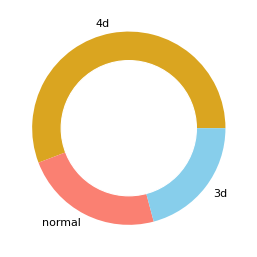

In [20]:
circulo_centro=plt.Circle( (0,0), 0.7, color='white')
plt.figure(dpi=80)
plt.pie(cantidad_salas.values, labels=cantidad_salas.index.to_list(), colors=['goldenrod','salmon','skyblue'])
p=plt.gcf()
p.gca().add_artist(circulo_centro)
plt.show()

Busquemos ahora si hay relacion con la secuela.


In [21]:
porcentaje_volveria_salas = info_fiumark_df.groupby(by='tipo_de_sala')['volveria'].agg('mean').round(2)
porcentaje_volveria_salas

tipo_de_sala
3d        0.49
4d        0.23
normal    0.64
Name: volveria, dtype: float64

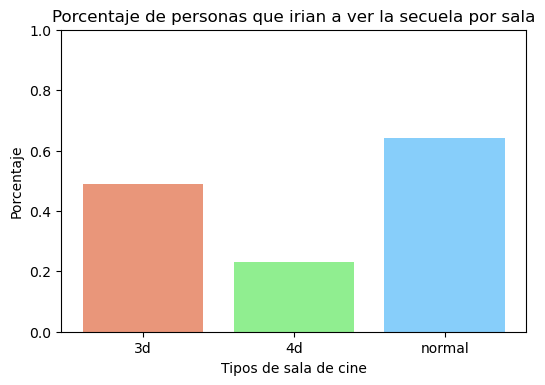

In [22]:
plt.figure(dpi=100)
plt.bar(porcentaje_volveria_salas.index, porcentaje_volveria_salas.values, color = ['darksalmon','lightgreen','lightskyblue'])
plt.ylabel("Porcentaje")
plt.xlabel("Tipos de sala de cine")
plt.ylim(0, 1)
plt.title('Porcentaje de personas que irian a ver la secuela por sala')
plt.show()

Observando los resultados, notamos que una gran cantidad de la gente que fue a la sala 4D, decidio que no volveria a ver la secuela (cercano al 80%). Uno de los motivos por los que esto puede llegar a ser es que las personas que deciden ir a esta sala esperan tener una gran experiencia debido a los efectos que agrega la sala, ya sean movimientos, niebla, lluvia, u otros efectos del estilo, los cuales pueden no estar siendo aprovechados del todo durante la proyeccion de la pelicula.


Con respecto a la sala 3D, podemos decir que no nos estaria aportando mucho por si sola. Esto se debe a que la mitad de la gente que decide ir a esta sala volveria a la secuela, mientras que el resto no. Resultando como si fuera el lanzamiento de una moneda.

Por ultimo, de la sala normal podemos decir que cerca del 64% dijo que vovleria a la secuela. Que una mayor cantidad diga en esta sala que volveria puede deberse a que ya conocieran de antes la serie de peliculas Frozen.

### ¿Cuanto afecta el genero a la hora de ir a ver la siguiente pelicula?

Veamos primero que proporcion de las personas que fueron a ver la pelicula son hombres y que proporcion mujeres:

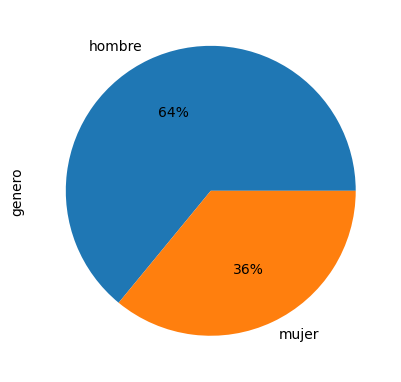

In [23]:
plt.figure(figsize=(6.4, 4.8), dpi=100)
genero = info_fiumark_df['genero'].value_counts().sort_index().plot(kind='pie', autopct='%1.0f%%')
plt.show()

Observamos que casi dos tercios de las personas que fueron a ver la pelicula son hombres y un tercio mujeres.
Si bien a primera vista esto parece indicar que la pelicula atrae mas a hombres que a mujeres debemos analizar si
estos hombres y mujeres disfrutaron la pelicula lo suficiente como para volver a verla.

Buscamos ver ahora que proporcion de los hombres y mujeres que fueron a ver la pelicula volverian a ver la secuela. Esto se puede obtener de forma sencilla.

A priori esperamos que la proporcion de mujeres que deciden ir a ver la secuela sea mucho mayor que la de los hombres que fueron a ver la pelicula.

In [24]:
porcentaje_generos_volveria = info_fiumark_df.groupby(by='genero')['volveria'].agg('mean')
porcentaje_generos_volveria.round(2)

genero
hombre    0.18
mujer     0.74
Name: volveria, dtype: float64

Habiendo hecho el calculo, en los numeros se ve claramente lo esperado.

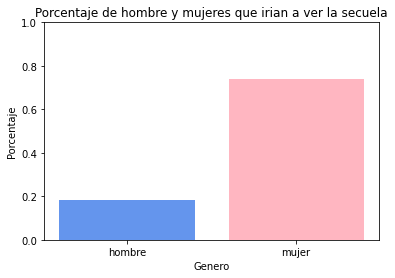

In [25]:
porcentaje_genero_volveria = info_fiumark_df.groupby(by='genero')['volveria'].agg('mean')
plt.bar(porcentaje_genero_volveria.index, porcentaje_genero_volveria.values, color = ['cornflowerblue','lightpink'])
plt.ylabel("Porcentaje")
plt.xlabel("Genero")
plt.ylim(0, 1)
plt.title('Porcentaje de hombre y mujeres que irian a ver la secuela')
plt.show()

El grafico nos dice que del total de mujeres que fue a ver la pelicula un 74% de ellas volveria a ver la secuela. Mientras que solo el 18% de los hombres consideraron que la pelicula disfruto la pelicula lo suficiente como para querer ir a ver la secuela.

Estas observaciones nos hicieron preguntarnos ¿Por que hubo tantos hombres fueron incialmente a ver la pelicula? Nuestras hipotesis son que pueden ser padres que llevaron a sus hijos a ver la pelicula.

Para responder esta pregunta buscamos primero ver la distribucion de las edades de los hombres y las mujeres, para ello realizamos un boxplot.

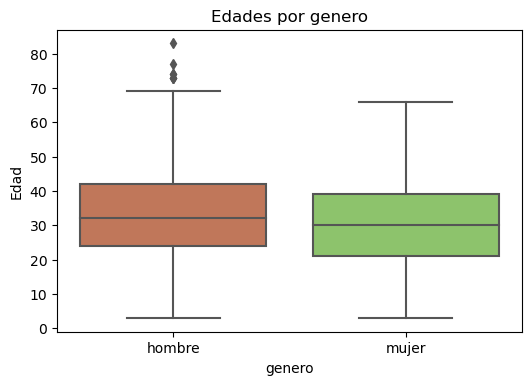

In [26]:
plt.figure(dpi=100)

plt.title("Edades por genero")
sns.boxplot(
    data= info_fiumark_df[['genero','edad']],
    y='edad',
    x='genero',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Edad")
plt.xticks([False, True])
plt.show()

Podemos ver que la edad mediana de los hombres que fueron a ver la pelicula es mayor que la de las mujeres por lo 
que en principio nuestra hipotesis de que los hombres mayores podria ser correcta??? 

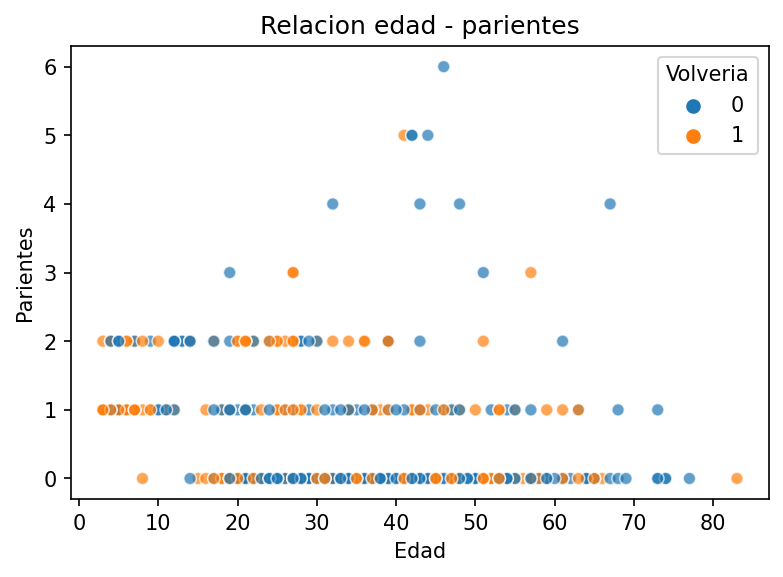

In [27]:
plt.figure(dpi=150)
sns.scatterplot(
    x='edad',
    y='parientes',
    hue=info_fiumark_df['volveria'].tolist(),
    data=info_fiumark_df,
    alpha=0.7,
)
plt.legend(title="Volveria")
plt.ylabel("Parientes")
plt.xlabel("Edad")
plt.title('Relacion edad - parientes')
plt.show()

Podemos ver que las personas mayores de treinta no necesariamente fueron acompañando a un pariente lo cual 
pareceria indicar que nuestra hipotesis no es del todo correcta. 

El scatter plot anterior nos permitio ver que los niños de entre 0 y 10 anios van acompañados por un adulto. Ademas los niños que fueron acompaniados por exactamente 1 adulto pareciera que disfrutaron mas la pelicula que los que fueron acopaniados por 2.

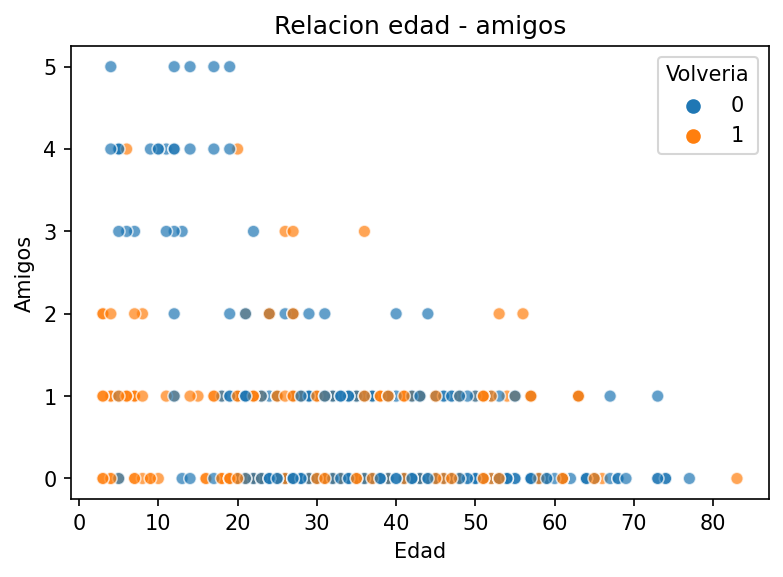

In [28]:
plt.figure(dpi=150)
sns.scatterplot(
    x='edad',
    y='amigos',
    hue=info_fiumark_df['volveria'].tolist(),
    data=info_fiumark_df,
    alpha=0.7,
)
plt.legend(title="Volveria")
plt.ylabel("Amigos")
plt.xlabel("Edad")
plt.title('Relacion edad - amigos')
plt.show()

En este scatter plot podemos ver que los jovenes menores a 20 años tienden a disfrutar la pelicula si fueron con
hasta 2 amigos. Si fueron con 3 amigos o mas tienden a no querer volver a ver la secuela

Intentemos relacionar ahora la edad de las personas y su genero con si volverian o no a ver la pelicula. Para eso 
agrupamos en hombres y mujeres y luego estos grupos por edad:

<Figure size 600x400 with 0 Axes>

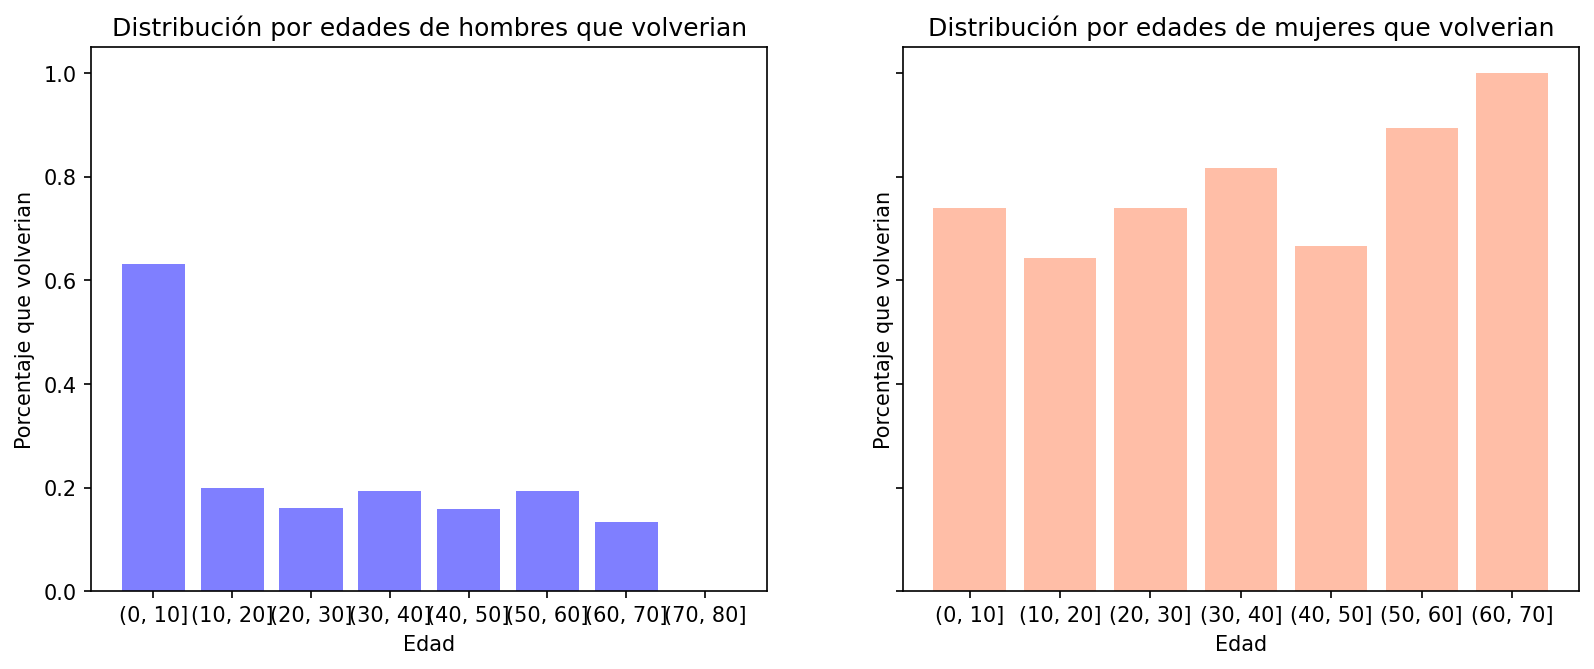

In [29]:
edad =  info_fiumark_df['edad']
genero = info_fiumark_df['genero']
volveria = info_fiumark_df['volveria']

hombres_vuelven = info_fiumark_df.loc[genero.str.contains('hombre') & (volveria == 1)]
hombres_total = info_fiumark_df.loc[genero.str.contains('hombre')]

mujeres_vuelven = info_fiumark_df.loc[genero.str.contains('mujer') & (volveria == 1)]
mujeres_total = info_fiumark_df.loc[genero.str.contains('mujer')]

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

cuts_total_mujeres = pd.cut(mujeres_total['edad'], bins = bins)
cuts_vuelven_mujeres = pd.cut(mujeres_vuelven['edad'], bins = bins)

cuts_total_hombres = pd.cut(hombres_total['edad'], bins = bins)
cuts_vuelven_hombres = pd.cut(hombres_vuelven['edad'], bins = bins)

serie_hombres = pd.Series(cuts_vuelven_hombres.value_counts()/cuts_total_hombres.value_counts())
serie_mujeres = pd.Series(cuts_vuelven_mujeres.value_counts()/cuts_total_mujeres.value_counts())

plt.figure(dpi=100)


fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))



axes[0].bar(serie_hombres.index.astype(str), serie_hombres.values, color = 'blue', alpha = 0.5)


axes[0].set_title("Distribución por edades de hombres que volverian")
axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Porcentaje que volverian")

axes[1].bar(serie_mujeres.index.astype(str), serie_mujeres.values, color = 'coral', alpha = 0.5)

axes[1].set_title("Distribución por edades de mujeres que volverian")
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Porcentaje que volverian")

plt.show()

Se puede ver claramente que a los hombres de edades entre 0 y 10 les gusto mucho mas que al resto de los hombres.
Por otro lado el porcentaje de mujeres que volverian a ver la pelicula es mayor que el de hombres para todos los rangos de edades y parece ir ligeramente aumentando con la edad.

### ¿Hay mas gente que iria a la secuela si fue a una sede en particular?

En esta pregutna nos interesa saber si por algun motivo alguna sede en particular ayuda a influenciar la ida a la secuela.

Empecemos viendo cuantas sedes tenemos y como se distribuyo la cantidad de gente que fue a cada una. De ahi veremos si surge que en alguna sede dicen de ir a la secuela.

In [31]:
info_fiumark_df['nombre_sede'].value_counts()

fiumark_palermo      579
fiumark_chacarita    149
fiumark_quilmes       71
Name: nombre_sede, dtype: int64

Observando lo obtenido, notamos que tenemos 3 sedes y que la mayoria de los encuestados corresponden a la cede de fiumark en Palermo.

In [39]:
info_fiumark_df.groupby(by='nombre_sede').agg({'volveria':'mean'})

,volveria
nombre_sede,
fiumark_chacarita,0.557047
fiumark_palermo,0.336788
fiumark_quilmes,0.380282


Al ver cuantos volverian por sede, obtenemos que la sede no parece ser tan determinante por si sola, quizas podemos mencionar que en la de Palermo parece que se tiene a que no se volveria.

# VER QUE MAS PODEMOS SACAR DE ESTO #scatter precio,sede,vuelve?

### ¿El precio fue determinante?

Veamos primero como se distribuyen los precios, y despues la relacion con respecto a la variable de interes.

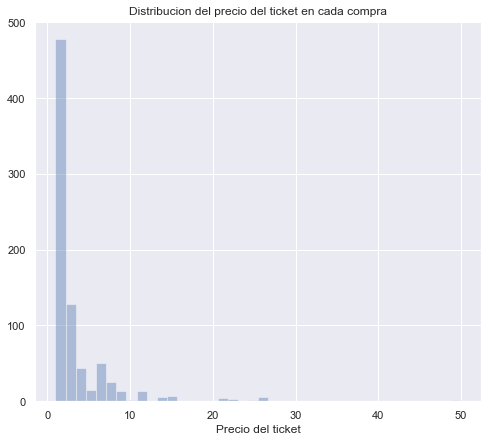

In [38]:
sns.set(rc={'figure.figsize':(8,7)})
g=sns.distplot( a=info_fiumark_df['precio_ticket'],
             hist=True, kde=False, rug=False,
             bins=40,
             axlabel='Precio del ticket')
g.set_title('Distribucion del precio del ticket en cada compra')

plt.show()

Podemos observar que la mayoria de los que fueron a ver la pelicula pago precios inferiores a 10, con algunos casos excepcionales que pagaron alrededor de 50. Veamos la relacion ahora.

In [32]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, np.inf]
rango_precios = pd.cut(info_fiumark_df['precio_ticket'], bins=bins)

volveria_por_rango_precio = info_fiumark_df.groupby(by=rango_precios)['volveria'].value_counts()
volveria_por_rango_precio_df = volveria_por_rango_precio.to_frame()
volveria_por_rango_precio_df.rename(columns={'volveria':'Cantidad de respuestas'},inplace=True)
volveria_por_rango_precio_df.reset_index(inplace=True)
volveria_por_rango_precio_df.rename(columns={'volveria':'Vuelve a la secuela','precio_ticket':'Rango de precios'},inplace=True)

In [33]:
volveria_por_rango_precio_df['Vuelve a la secuela'].replace([0,1],['No','Si'],inplace=True)

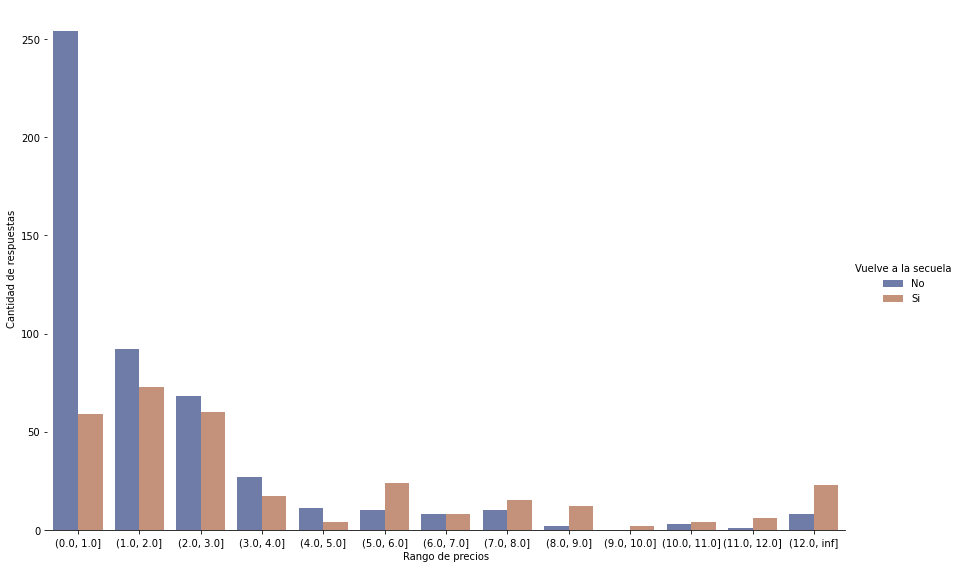

In [34]:
g = sns.catplot(
    data=volveria_por_rango_precio_df, kind="bar",
    x="Rango de precios", y="Cantidad de respuestas", hue="Vuelve a la secuela",
    ci=None, palette="dark", alpha=.6, height=8,aspect=1.5
)
g.despine(left=True)
g.set_axis_labels("Rango de precios", "Cantidad de respuestas")

Veamos ahora normalizado que obtenemos.

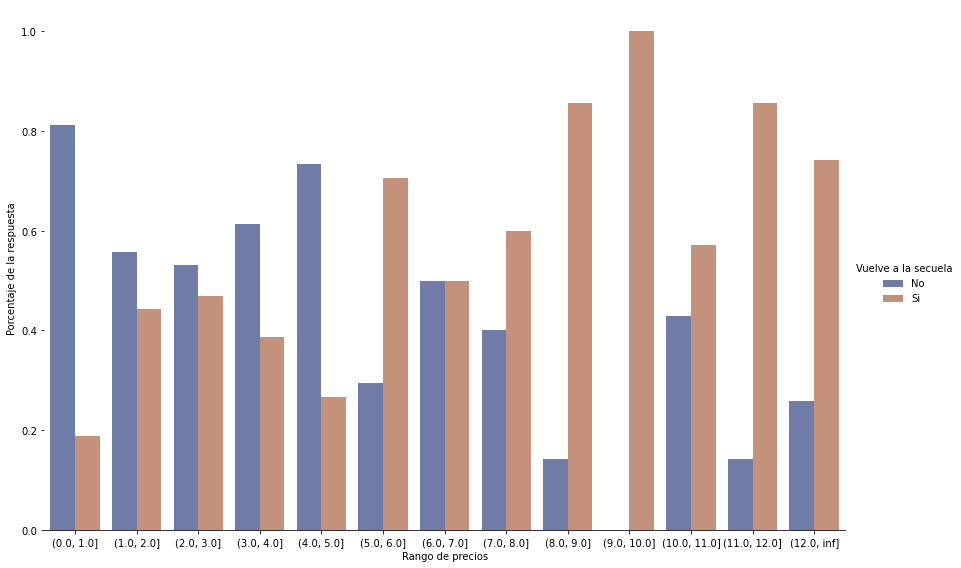

In [35]:
volveria_por_rango_precio = info_fiumark_df.groupby(by=rango_precios)['volveria'].value_counts(normalize=True)
volveria_por_rango_precio_df = volveria_por_rango_precio.to_frame()
volveria_por_rango_precio_df.rename(columns={'volveria':'Cantidad de respuestas'},inplace=True)
volveria_por_rango_precio_df.reset_index(inplace=True)
volveria_por_rango_precio_df.rename(columns={'volveria':'Vuelve a la secuela','precio_ticket':'Rango de precios'},inplace=True)
volveria_por_rango_precio_df['Vuelve a la secuela'].replace([0,1],['No','Si'],inplace=True)

g = sns.catplot(
    data=volveria_por_rango_precio_df, kind="bar",
    x="Rango de precios", y="Cantidad de respuestas", hue="Vuelve a la secuela",
    ci=None, palette="dark", alpha=.6, height=8,aspect=1.5
)
g.despine(left=True)
g.set_axis_labels("Rango de precios", "Porcentaje de la respuesta")

Lo que nos encontramos es que en el rango mas bajo (de 0 a 1) la mayoria respondio que no volveria, mientras que a partir de que se empieza a incrementar el precio aumenta la cantidad de gente que responde que vuelve. Una hipotesis respecto a esto puede ser que la gente que gasto mas se convence que el gasto realizado valio la pena, de forma tal de que se van con una mejor opinion respecto a la pelicula y una potencial secuela.

## Conclusiones del analisis

## Baseline

In [37]:
#A partir de todo el análisis anterior, construir el código baseline que se va a usar para la primera ronda de campaña digital.
#Fundamentar el código basándose en las conclusiones de los anteriores puntos.
#La función baseline debe llamarse baseline(X: pd.DataFrame) -> List[int]. la cual debe recibir un pandas dataframe producido de la lectura del archivo de testeo original y devolver una lista
